<div align="center">
  <h1><strong>NOTEBOOK TUGAS BESAR</strong></h1>
  <h2><strong>DATA WAREHOUSE AND BUSINESS INTELLIGENCE</strong></h2>
  <br>
  <h3>KELOMPOK 3 - SI4605</h3>
  <table style="margin-top: 50px; margin-bottom: 30px; width: 60%; text-align: center;">
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
    <tr>
      <td>Ahmad Fauzi</td>
      <td>1202220263</td>
    </tr>
    <tr>
      <td>Nerlis Fitria Nurani</td>
      <td>1202223307</td>
    </tr>
    <tr>
      <td>Rafie Safaraz Aribowo</td>
      <td>1202223025</td>
    </tr>
    <tr>
        <td>Ryannisa Syarifa Triandini</td>
        <td>1202223163</td>
    </tr>
    <tr>
        <td>Sarah Luki Raihani</td>
        <td>1202223084</td>
    </tr>
  </table>
</div>

<br>

---

&nbsp;
&nbsp;

# **CatBoost Classifier (Classification)**

---

## **Import Libraries**

In [75]:
# 🔹 Library untuk manipulasi data
import pandas as pd
import numpy as np

# 🔹 Library untuk visualisasi
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# 🔹 Library untuk preprocessing dan pemodelan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 🔹 Library untuk algoritma machine learning
import catboost as cb

# 🔹 Library untuk evaluasi model
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, f1_score,
    roc_curve, auc, roc_auc_score, silhouette_score
)

# 🔹 Pengaturan umum
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

# 🔹 Styling plot
plt.style.use("ggplot")
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', None)

## **Data Understanding Phase**

### Read & Exploring Data

In [2]:
df_train = pd.read_csv("hotel_bookings.csv")

df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df_train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df_train.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [6]:
# Buat dataframe ringkasan missing values
missing = df_train.isnull().sum()
missing_percent = (missing / len(df_train)) * 100

missing_df = (
    pd.DataFrame({
        'Fitur': missing.index,
        'Jumlah Missing': missing.values,
        'Persentase (%)': missing_percent.round(2)
    })
    .sort_values(by='Persentase (%)', ascending=False)
    .reset_index(drop=True)
)

# Tampilkan hanya fitur yang memiliki missing value
missing_df = missing_df[missing_df['Jumlah Missing'] > 0]

# Tampilkan hasil
print("📋 Ringkasan Missing Values pada df_train:")
display(missing_df.style
        .bar(subset=['Persentase (%)'], color='#ffa07a')
        .background_gradient(subset=['Jumlah Missing'], cmap='Reds')
        .set_properties(**{'text-align': 'left'})
        .set_caption("Tabel Informasi Missing Value"))

📋 Ringkasan Missing Values pada df_train:


,Fitur,Jumlah Missing,Persentase (%)
0,company,112593,94.310000
1,agent,16340,13.690000
2,country,488,0.410000
22,children,4,0.000000


In [7]:
# Buat dataframe ringkasan unique values untuk object dan categorical
df_categorical = df_train.select_dtypes(include=['object', 'category'])
unique = df_categorical.nunique()
data_types = df_categorical.dtypes
sample_values = [df_categorical[col].dropna().unique()[:10] for col in df_categorical.columns]
unique_percent = (unique / len(df_categorical)) * 100

unique_df = (
    pd.DataFrame({
        'Fitur': df_categorical.columns,
        'Jumlah Unique': unique.values,
        'Persentase (%)': unique_percent.round(2),
        'Tipe Data': data_types.values,
        'Contoh Nilai Unik': sample_values
    })
    .sort_values(by='Persentase (%)', ascending=False)  # ⬅️ urutkan dari paling tinggi
    .reset_index(drop=True)
)

# Tampilkan hasil
print("📋 Ringkasan Unique Values pada df_categorical:")
display(unique_df.style
        .bar(subset=['Persentase (%)'], color='#ffa07a')
        .background_gradient(subset=['Jumlah Unique'], cmap='Reds')
        .set_properties(**{'text-align': 'left'})
        .set_caption("Tabel Informasi Unique Value per Kolom di df_categorical"))

📋 Ringkasan Unique Values pada df_categorical:


,Fitur,Jumlah Unique,Persentase (%),Tipe Data,Contoh Nilai Unik
0,reservation_status_date,926,0.780000,object,['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22' '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08']
1,country,177,0.150000,object,['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG']
2,arrival_date_month,12,0.010000,object,['July' 'August' 'September' 'October' 'November' 'December' 'January' 'February' 'March' 'April']
3,market_segment,8,0.010000,object,['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups' 'Undefined' 'Aviation']
4,reserved_room_type,10,0.010000,object,['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
5,assigned_room_type,12,0.010000,object,['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P']
6,hotel,2,0.000000,object,['Resort Hotel' 'City Hotel']
7,meal,5,0.000000,object,['BB' 'FB' 'HB' 'SC' 'Undefined']
8,distribution_channel,5,0.000000,object,['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
9,deposit_type,3,0.000000,object,['No Deposit' 'Refundable' 'Non Refund']


---

## **Exploratory Data Analysis (EDA)**

### Correlation Matrix Analysis

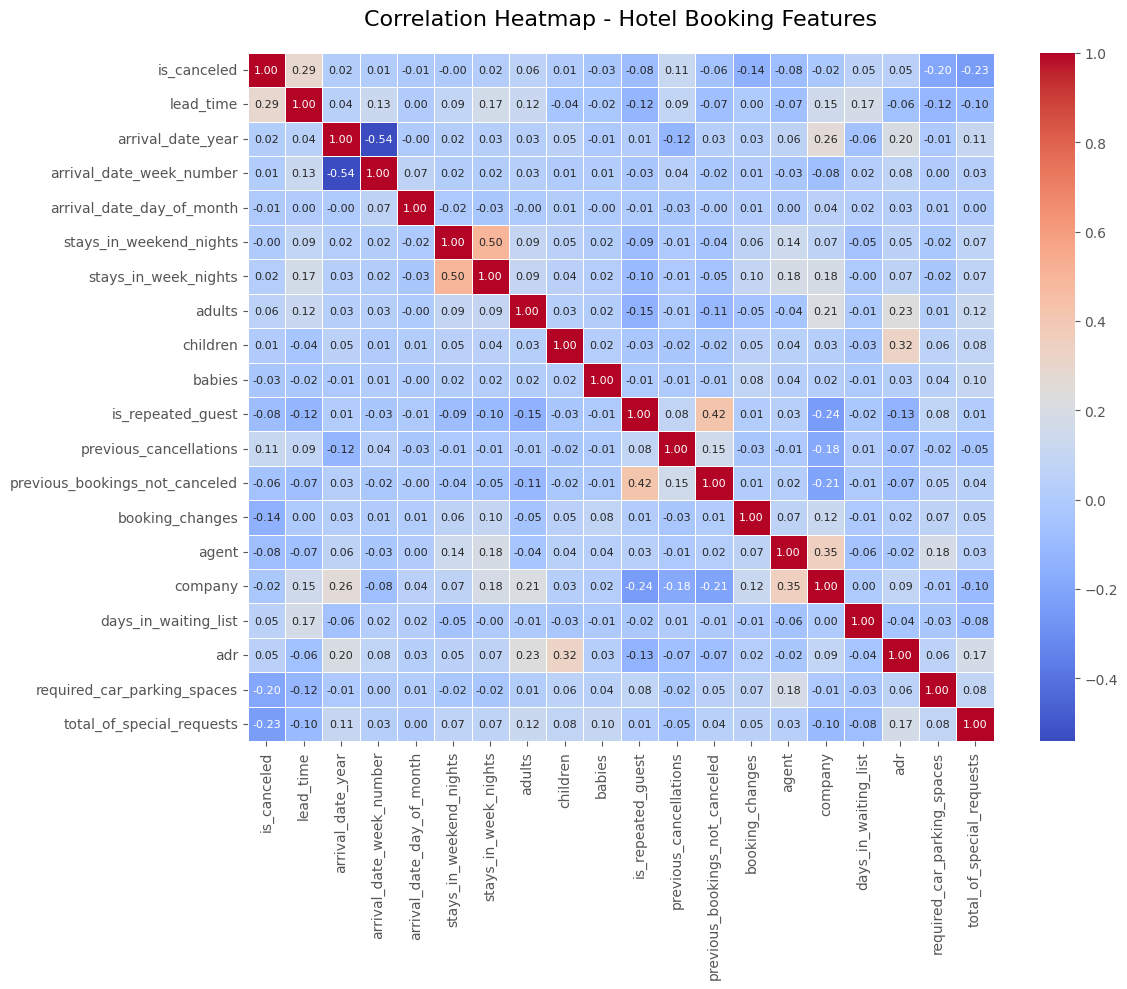

In [8]:
# Mengatur ukuran gambar dan resolusi
plt.figure(figsize=(12, 10))

# Memilih hanya kolom numerik untuk korelasi
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menghitung korelasi (Pearson's correlation coefficient)
correlation_matrix = df_train[numeric_columns].corr()

# Membuat heatmap
sns.heatmap(correlation_matrix, 
            annot=True,             # Menampilkan nilai korelasi
            cmap='coolwarm',        # Colormap: merah (positive) dan biru (negative)
            fmt='.2f',              # Format angka (2 desimal)
            linewidths=0.5,         # Lebar garis pemisah
            annot_kws={"size": 8})  # Ukuran teks angka

# Mengatur judul dan label
plt.title('Correlation Heatmap - Hotel Booking Features', fontsize=16, pad=20)
plt.tight_layout()

# Menampilkan plot
plt.show()

### Boxplot (Outlier) Analysis

<Figure size 3000x3600 with 0 Axes>

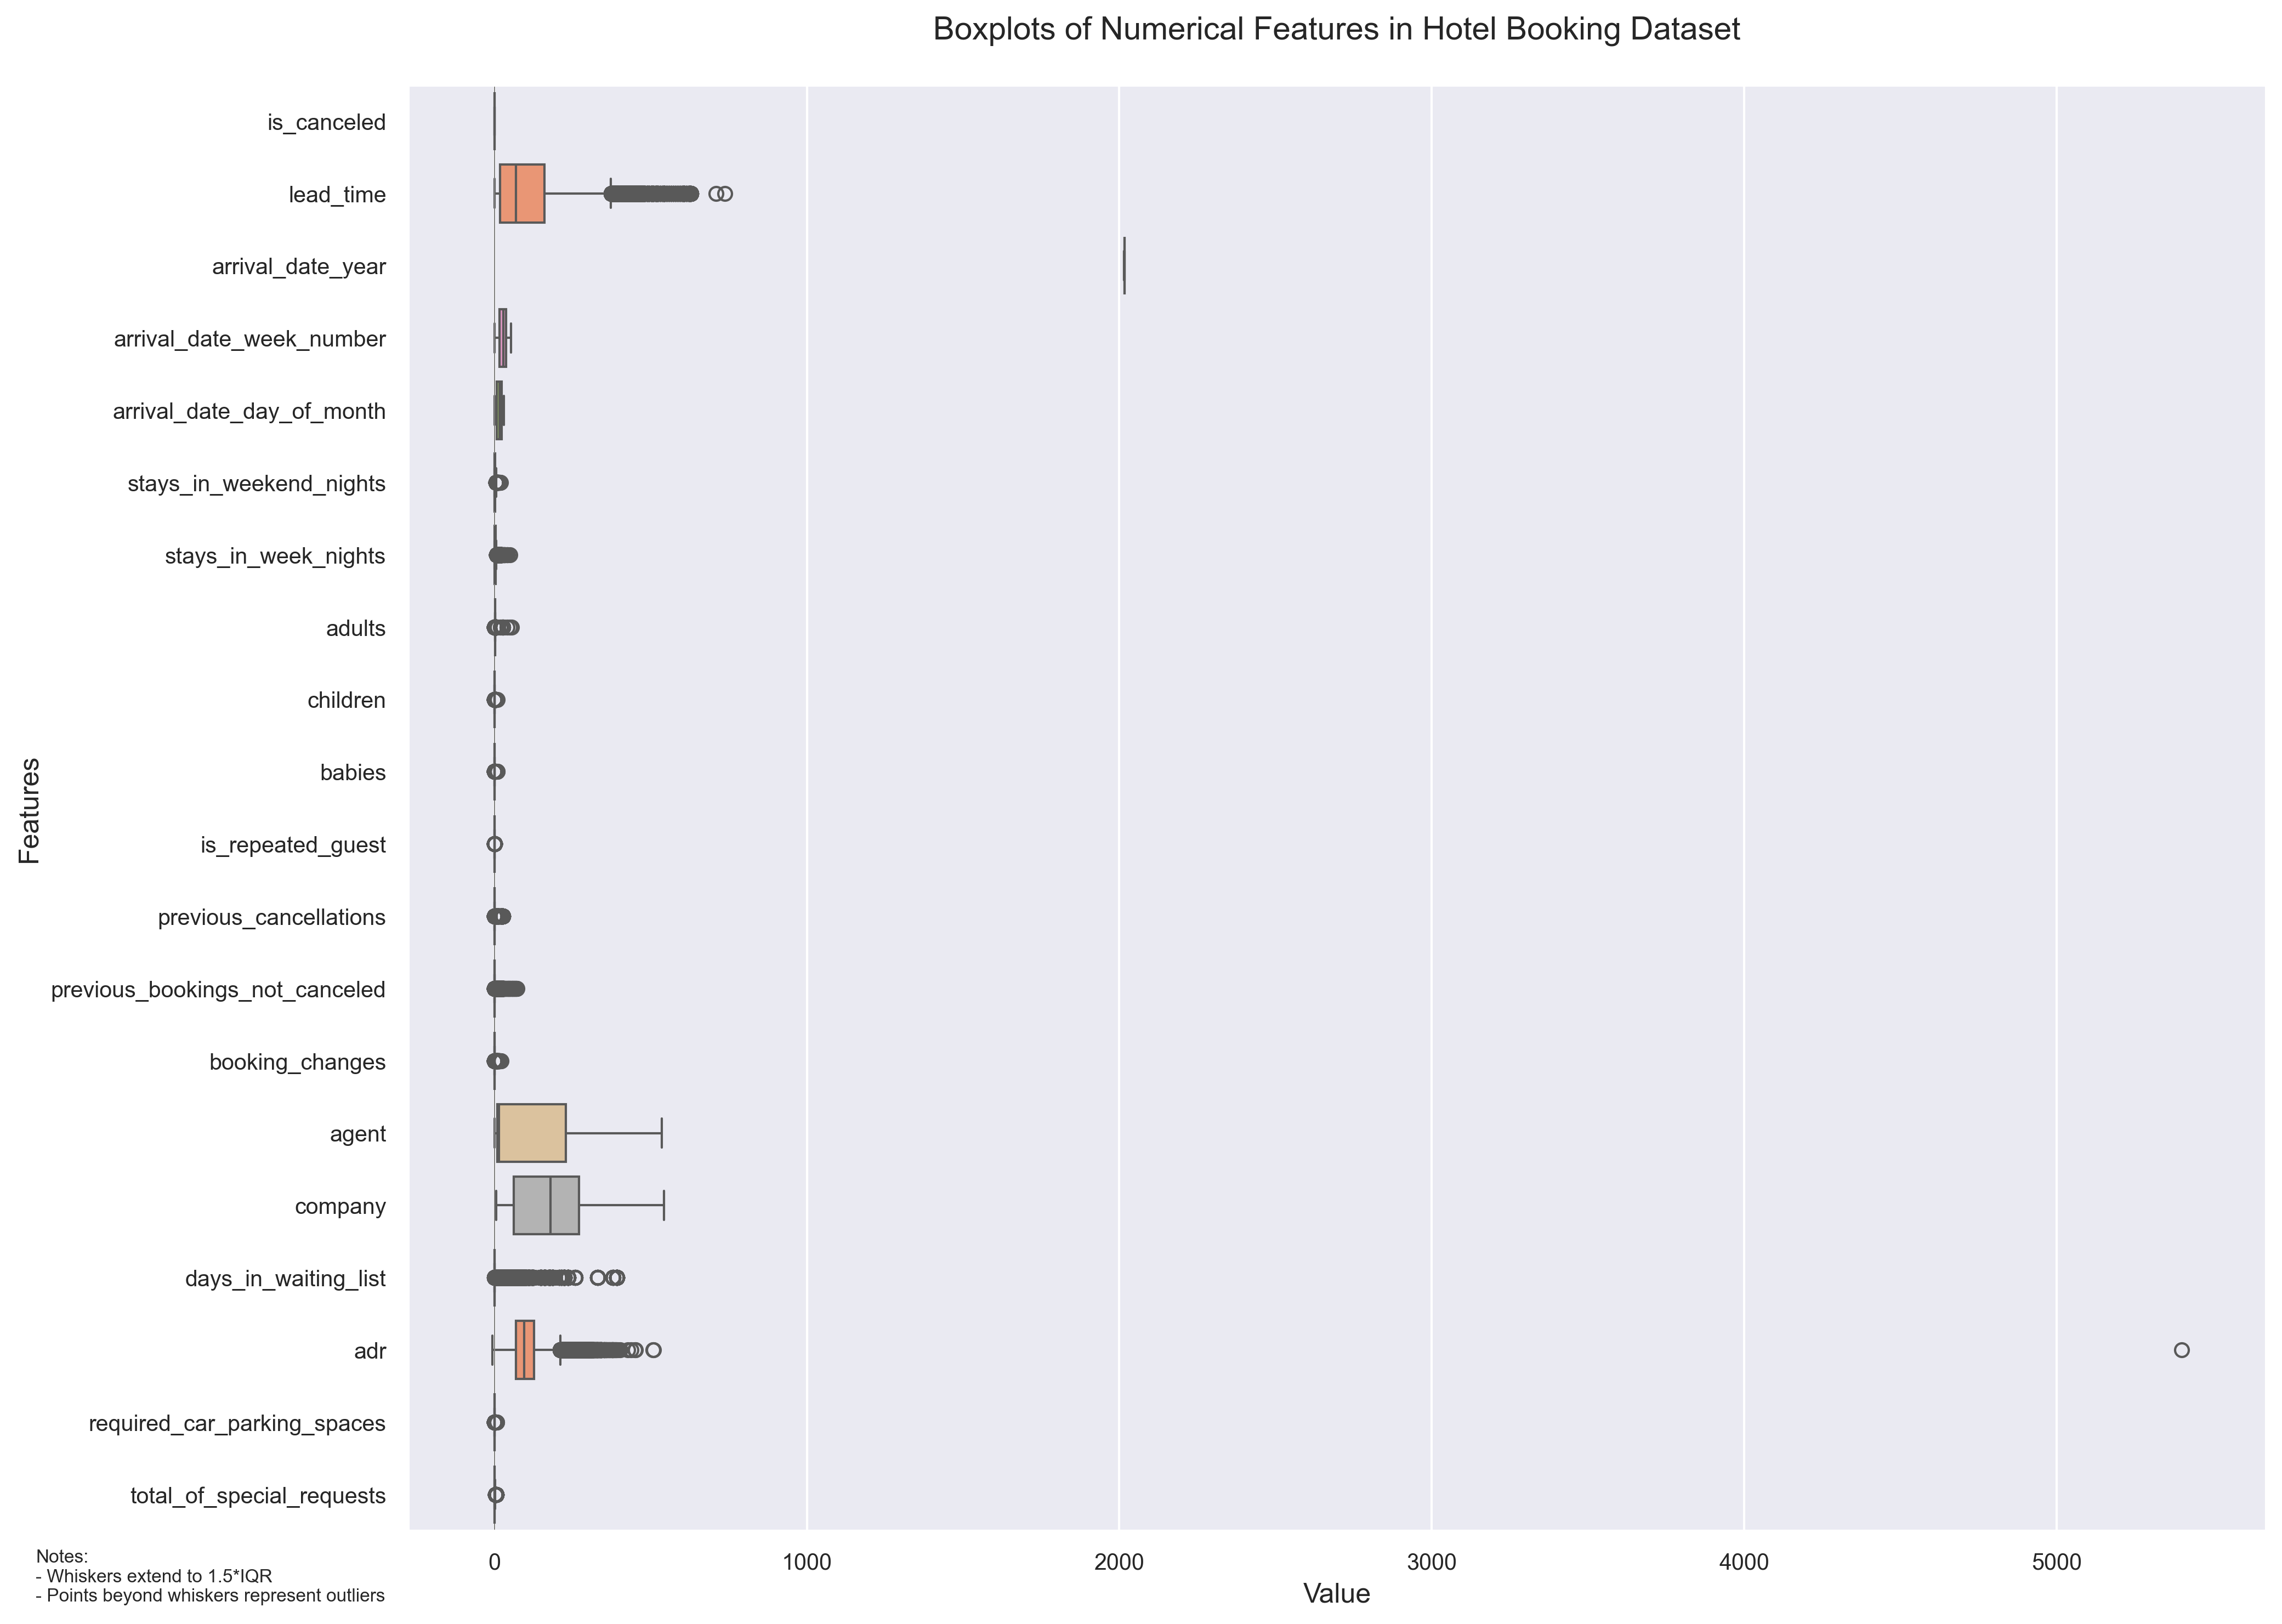

In [9]:
# Set style untuk visualisasi yang lebih baik pada laporan
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=0.9)
plt.rcParams['figure.dpi'] = 300  # Higher DPI for report-quality images

# Filter kolom numerik secara eksplisit
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
columns_to_plot = numeric_columns

# Mengatur ukuran gambar berdasarkan jumlah kolom
fig_height = len(columns_to_plot) * 0.6
plt.figure(figsize=(10, fig_height))

# Membuat subplot untuk boxplot berbagai fitur
# Menggunakan orientasi horizontal agar lebih mudah dibaca pada laporan
plt.figure(figsize=(14, 10))
ax = sns.boxplot(data=df_train[columns_to_plot], orient='h', palette='Set2')

# Mengatur judul dan label
plt.title('Boxplots of Numerical Features in Hotel Booking Dataset', pad=20, fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Menambahkan garis vertikal pada x=0 untuk referensi
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)

# Merapikan tampilan
plt.tight_layout()

# Menambahkan keterangan outlier
textstr = 'Notes:\n- Whiskers extend to 1.5*IQR\n- Points beyond whiskers represent outliers'
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7)
plt.gcf().text(0.02, 0.02, textstr, fontsize=8, bbox=props)


# Menampilkan plot
plt.show()

### Target Distribution (is Canceled)

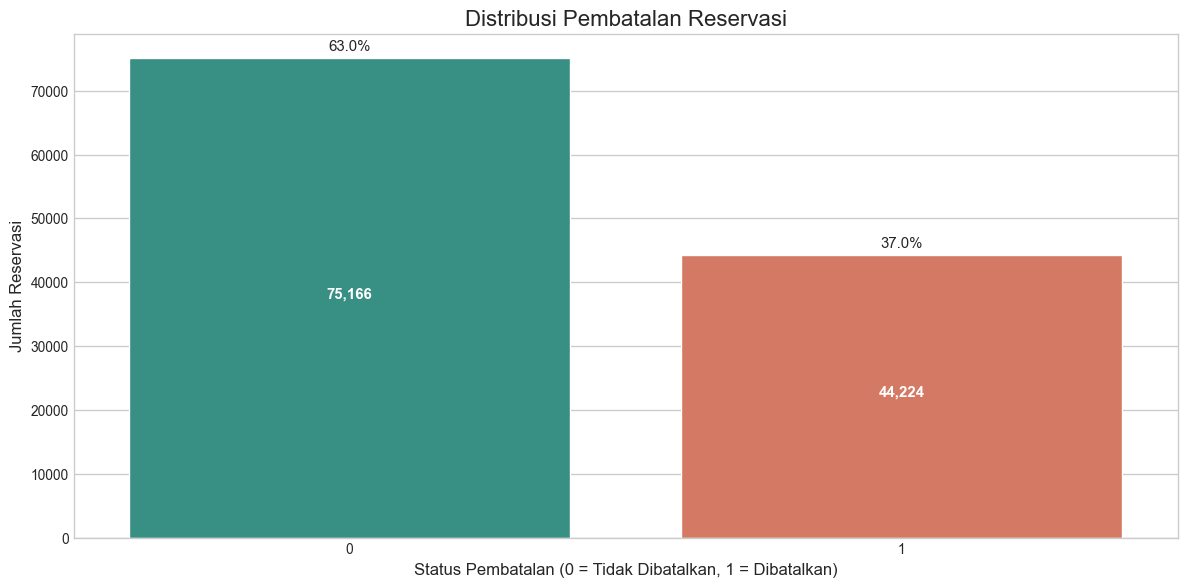

In [10]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
colors = ["#2a9d8f", "#e76f51", "#e9c46a", "#264653", "#f4a261"]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='is_canceled', data=df_train, palette=colors[:2])
plt.title('Distribusi Pembatalan Reservasi', fontsize=16)
plt.xlabel('Status Pembatalan (0 = Tidak Dibatalkan, 1 = Dibatalkan)', fontsize=12)
plt.ylabel('Jumlah Reservasi', fontsize=12)

# Menambahkan persentase di atas bar
total = len(df_train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + total * 0.01
    ax.annotate(percentage, (x, y), ha='center')
    
    # Menambahkan jumlah di dalam bar
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (x, p.get_height()/2), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### Cancellation Percentage Based on Hotel Type

<Figure size 1200x600 with 0 Axes>

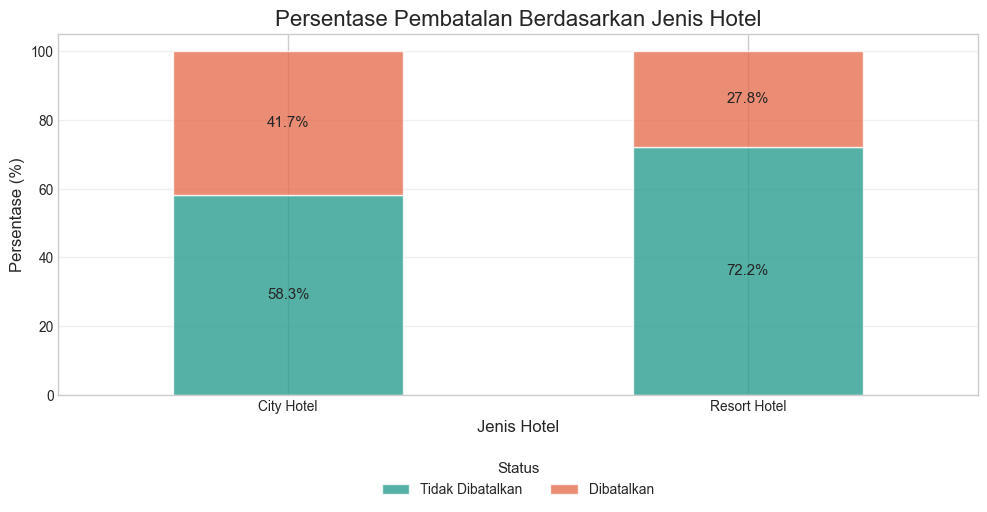

In [11]:
plt.figure(figsize=(12, 6))
hotel_cancel = pd.crosstab(df_train['hotel'], df_train['is_canceled'], normalize='index') * 100
ax = hotel_cancel.plot(kind='bar', stacked=True, color=colors[:2], alpha=0.8)
plt.title('Persentase Pembatalan Berdasarkan Jenis Hotel', fontsize=16)
plt.xlabel('Jenis Hotel', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=0)

# Pindahkan legend ke posisi yang lebih baik - di luar plot
plt.legend(['Tidak Dibatalkan', 'Dibatalkan'], title='Status', 
          loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Menambahkan label persentase di tengah bar
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 5:  # Hanya tampilkan label jika persentase > 5%
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.grid(axis='y', alpha=0.3)

# Menambahkan padding ekstra di bagian bawah untuk legend
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

### The Relationship Between Lead Time and Cancellation Rate

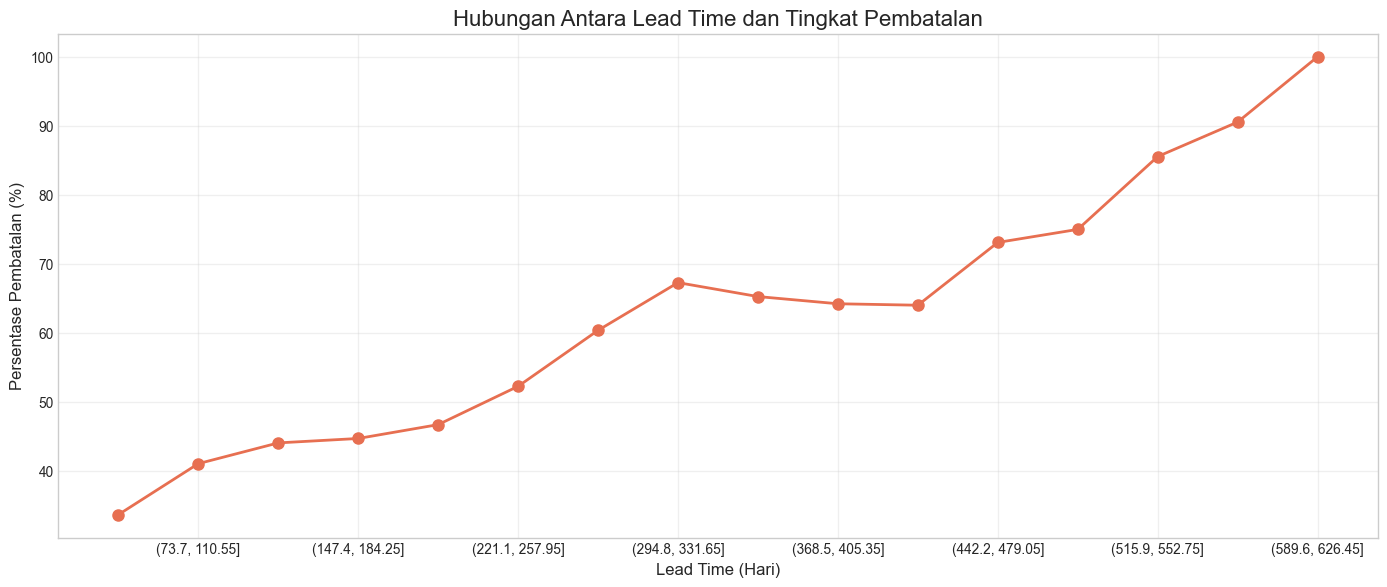

In [12]:
plt.figure(figsize=(14, 6))

# Mengelompokkan lead time dan menghitung rata-rata pembatalan
lead_time_groups = pd.cut(df_train['lead_time'], bins=20)
lead_time_cancel = df_train.groupby(lead_time_groups)['is_canceled'].mean() * 100

# Plot dengan rolling average untuk smoothing
ax = lead_time_cancel.rolling(window=3, center=True).mean().plot(
    marker='o', markersize=8, linestyle='-', linewidth=2, color=colors[1]
)
plt.title('Hubungan Antara Lead Time dan Tingkat Pembatalan', fontsize=16)
plt.xlabel('Lead Time (Hari)', fontsize=12)
plt.ylabel('Persentase Pembatalan (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cancellation Percentage Based on Month of Arrival

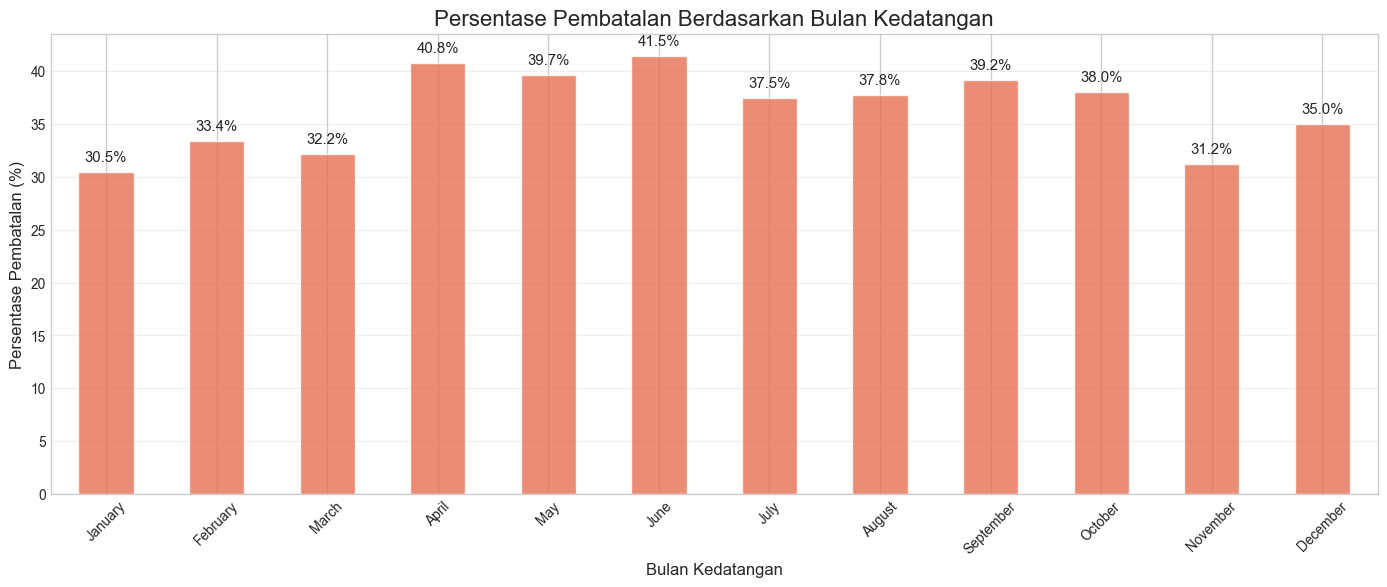

In [13]:
plt.figure(figsize=(14, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_data = pd.crosstab(df_train['arrival_date_month'], df_train['is_canceled'])
month_data_pct = month_data.div(month_data.sum(axis=1), axis=0) * 100

# Plot persentase pembatalan per bulan
ax = month_data_pct[1].reindex(month_order).plot(kind='bar', color=colors[1], alpha=0.8)
plt.title('Persentase Pembatalan Berdasarkan Bulan Kedatangan', fontsize=16)
plt.xlabel('Bulan Kedatangan', fontsize=12)
plt.ylabel('Persentase Pembatalan (%)', fontsize=12)
plt.xticks(rotation=45)

# Menambahkan label persentase di atas bar
for i, v in enumerate(month_data_pct[1].reindex(month_order)):
    ax.text(i, v+1, f'{v:.1f}%', ha='center')
    
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Cancellation Percentage Based on Guests' Country of Origin (Top 15 Countries)

<Figure size 1400x800 with 0 Axes>

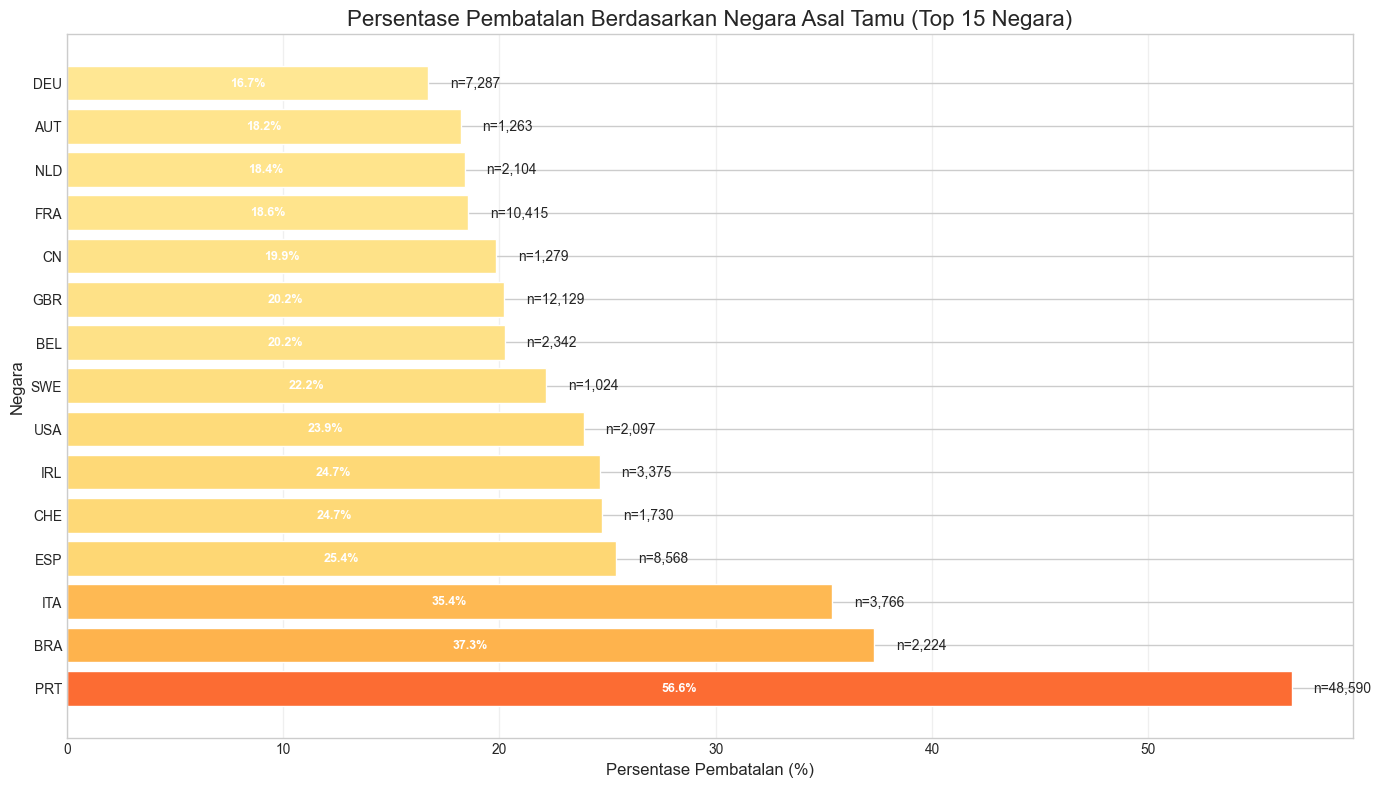

In [14]:
# Visualisasi Pembatalan Berdasarkan Negara (Top 15)
plt.figure(figsize=(14, 8))

# Hitung jumlah reservasi dan pembatalan per negara
country_stats = df_train.groupby('country')['is_canceled'].agg(['count', 'mean'])
country_stats.columns = ['Total_Reservations', 'Cancellation_Rate']
country_stats['Cancellation_Rate'] = country_stats['Cancellation_Rate'] * 100

# Filter untuk top 15 negara berdasarkan jumlah reservasi
top15_countries = country_stats.sort_values('Total_Reservations', ascending=False).head(15)
top15_countries = top15_countries.sort_values('Cancellation_Rate', ascending=False)

# Plot persentase pembatalan untuk negara teratas
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(top15_countries.index, top15_countries['Cancellation_Rate'], 
              color=plt.cm.YlOrRd(top15_countries['Cancellation_Rate']/100))

# Tambahkan label jumlah reservasi di ujung setiap bar
for i, (idx, row) in enumerate(top15_countries.iterrows()):
    ax.text(row['Cancellation_Rate'] + 1, i, f'n={int(row["Total_Reservations"]):,}', 
           va='center', fontsize=10)
    # Tambahkan persentase di dalam bar
    ax.text(max(row['Cancellation_Rate']/2, 2), i, f'{row["Cancellation_Rate"]:.1f}%', 
           va='center', ha='center', fontsize=9, fontweight='bold', color='white')

plt.title('Persentase Pembatalan Berdasarkan Negara Asal Tamu (Top 15 Negara)', fontsize=16)
plt.xlabel('Persentase Pembatalan (%)', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('pembatalan_berdasarkan_negara.png', dpi=300, bbox_inches='tight')
plt.show()

### ADR (Average Daily Rate) Distribution Based on Cancellation Status

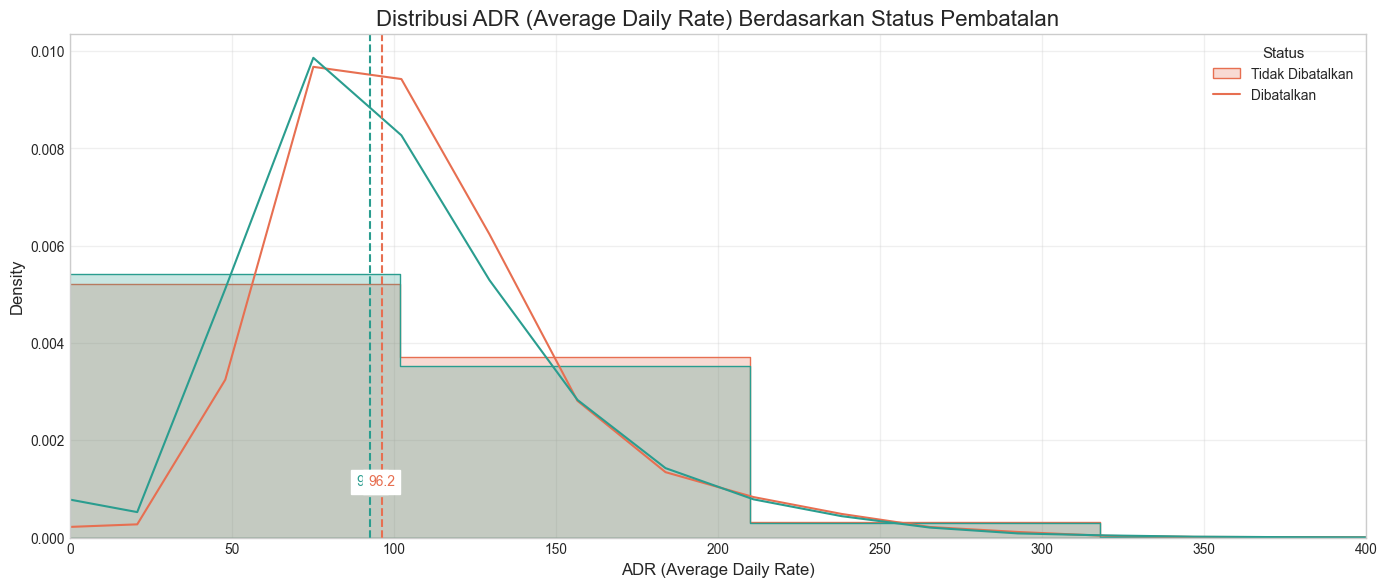

In [15]:
# 4.2 ADR (Average Daily Rate) Distribution by Cancellation Status
plt.figure(figsize=(14, 6))

# Plot distribusi ADR berdasarkan status pembatalan
sns.histplot(data=df_train, x='adr', hue='is_canceled', bins=50, 
            multiple='layer', palette=colors[:2], kde=True,
            element='step', stat='density', common_norm=False)

plt.title('Distribusi ADR (Average Daily Rate) Berdasarkan Status Pembatalan', fontsize=16)
plt.xlabel('ADR (Average Daily Rate)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Tidak Dibatalkan', 'Dibatalkan'], title='Status')

# Tambahkan median vertical line untuk setiap group
for i, status in enumerate([0, 1]):
    median_val = df_train[df_train['is_canceled'] == status]['adr'].median()
    plt.axvline(x=median_val, color=colors[i], linestyle='--', 
               label=f"Median ({'Tidak Dibatalkan' if status == 0 else 'Dibatalkan'}): {median_val:.2f}")
    plt.text(median_val, 0.001, f'{median_val:.1f}', color=colors[i], 
            ha='center', va='bottom', backgroundcolor='white', fontsize=10)

plt.xlim(0, 400)  # Limit x-axis for better visibility
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Number of Reservations Based on Deposit Type

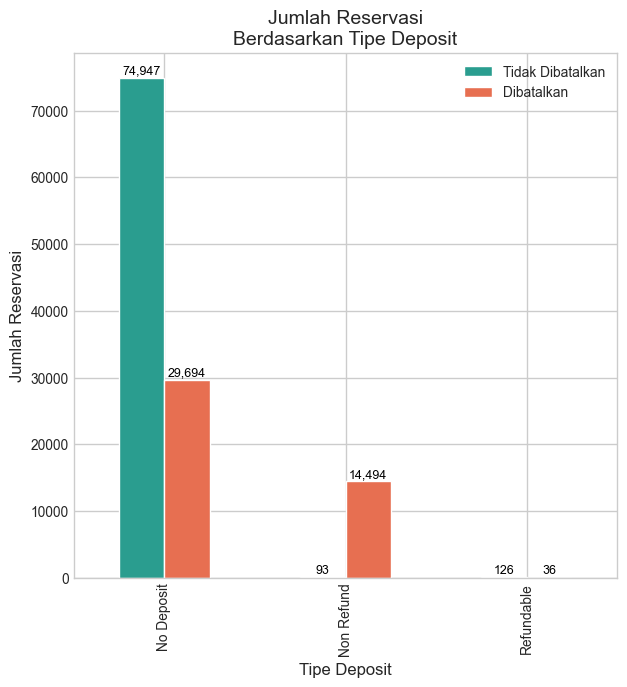

In [16]:
plt.figure(figsize=(12, 7))

# Hitung jumlah dan persentase
deposit_counts = pd.crosstab(df_train['deposit_type'], df_train['is_canceled'])
deposit_percentages = deposit_counts.div(deposit_counts.sum(axis=1), axis=0) * 100

# Plot untuk jumlah reservasi
ax2 = plt.subplot(1, 2, 2)
deposit_counts.plot(kind='bar', ax=ax2, color=colors[:2])
ax2.set_title('Jumlah Reservasi\nBerdasarkan Tipe Deposit', fontsize=14)
ax2.set_xlabel('Tipe Deposit', fontsize=12)
ax2.set_ylabel('Jumlah Reservasi', fontsize=12)
ax2.legend(['Tidak Dibatalkan', 'Dibatalkan'], loc='upper right')

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Analysis of the Impact of Booking History on Cancellation Behavior

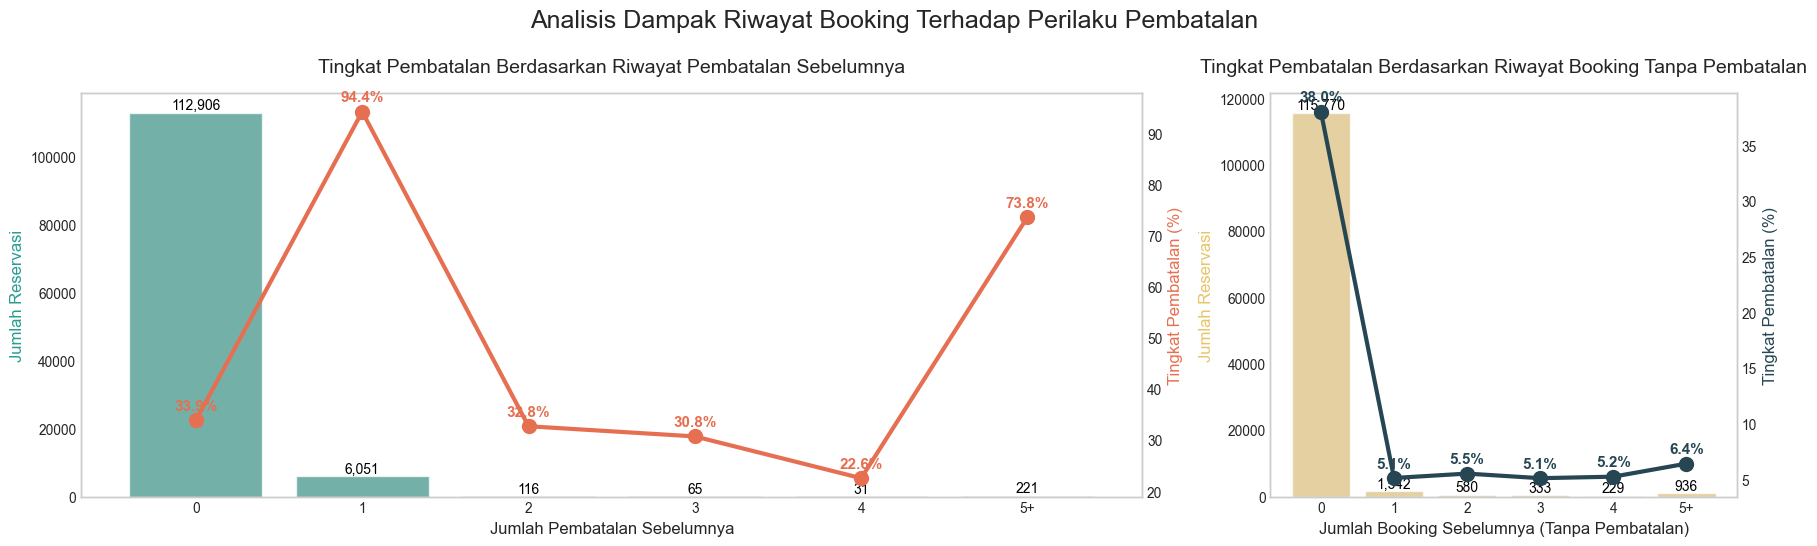

In [17]:
# Set style untuk visualisasi yang menarik
plt.style.use('seaborn-v0_8-whitegrid')
custom_colors = ["#2a9d8f", "#e76f51", "#e9c46a", "#264653", "#f4a261"]
sns.set_palette(custom_colors)

# Buat custom colormap untuk heatmap
custom_cmap = LinearSegmentedColormap.from_list("custom_diverging", 
                                               ["#2a9d8f", "#ffffff", "#e76f51"], 
                                               N=256)

# Siapkan figure dengan subplots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1.2])

# ----- SUBPLOT 1: Perbandingan Tingkat Pembatalan Berdasarkan Riwayat Pembatalan -----
ax1 = fig.add_subplot(gs[0, :2])

# Buat kategori untuk previous_cancellations: 0, 1, 2, 3, 4, 5+
df_train['prev_cancel_cat'] = pd.cut(
    df_train['previous_cancellations'], 
    bins=[-1, 0, 1, 2, 3, 4, float('inf')],
    labels=['0', '1', '2', '3', '4', '5+']
)

# Hitung tingkat pembatalan untuk setiap kategori
cancel_rates = df_train.groupby('prev_cancel_cat')['is_canceled'].agg(['count', 'mean'])
cancel_rates['mean'] = cancel_rates['mean'] * 100
cancel_rates.columns = ['Jumlah Reservasi', 'Tingkat Pembatalan (%)']

# Bar plot dengan dual axis
bars = sns.barplot(x=cancel_rates.index, y='Jumlah Reservasi', data=cancel_rates, 
           ax=ax1, color=custom_colors[0], alpha=0.7)

# Tambahkan jumlah di atas bar
for i, p in enumerate(bars.patches):
    ax1.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Buat axis kedua untuk tingkat pembatalan
ax1_2 = ax1.twinx()
line = ax1_2.plot(cancel_rates.index, cancel_rates['Tingkat Pembatalan (%)'], 
               marker='o', linestyle='-', linewidth=3, color=custom_colors[1],
               markersize=10)

# Tambahkan nilai persentase di atas titik
for i, v in enumerate(cancel_rates['Tingkat Pembatalan (%)']):
    ax1_2.annotate(f'{v:.1f}%', 
                  xy=(i, v),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=11, fontweight='bold', color=custom_colors[1])

# Tambahkan ticks dan grid
ax1.set_xlabel('Jumlah Pembatalan Sebelumnya', fontsize=12)
ax1.set_ylabel('Jumlah Reservasi', fontsize=12, color=custom_colors[0])
ax1_2.set_ylabel('Tingkat Pembatalan (%)', fontsize=12, color=custom_colors[1])
ax1.grid(False)
ax1_2.grid(False)

# Judul subplot
ax1.set_title('Tingkat Pembatalan Berdasarkan Riwayat Pembatalan Sebelumnya', fontsize=14, pad=15)

# ----- SUBPLOT 2: Perbandingan Tingkat Pembatalan Berdasarkan Riwayat Non-Pembatalan -----
ax2 = fig.add_subplot(gs[0, 2:])

# Buat kategori untuk previous_bookings_not_canceled: 0, 1, 2, 3, 4, 5+
df_train['prev_notcancel_cat'] = pd.cut(
    df_train['previous_bookings_not_canceled'], 
    bins=[-1, 0, 1, 2, 3, 4, float('inf')],
    labels=['0', '1', '2', '3', '4', '5+']
)

# Hitung tingkat pembatalan untuk setiap kategori
notcancel_rates = df_train.groupby('prev_notcancel_cat')['is_canceled'].agg(['count', 'mean'])
notcancel_rates['mean'] = notcancel_rates['mean'] * 100
notcancel_rates.columns = ['Jumlah Reservasi', 'Tingkat Pembatalan (%)']

# Bar plot dengan dual axis
bars2 = sns.barplot(x=notcancel_rates.index, y='Jumlah Reservasi', data=notcancel_rates, 
            ax=ax2, color=custom_colors[2], alpha=0.7)

# Tambahkan jumlah di atas bar
for i, p in enumerate(bars2.patches):
    ax2.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Buat axis kedua untuk tingkat pembatalan
ax2_2 = ax2.twinx()
line2 = ax2_2.plot(notcancel_rates.index, notcancel_rates['Tingkat Pembatalan (%)'], 
                marker='o', linestyle='-', linewidth=3, color=custom_colors[3],
                markersize=10)

# Tambahkan nilai persentase di atas titik
for i, v in enumerate(notcancel_rates['Tingkat Pembatalan (%)']):
    ax2_2.annotate(f'{v:.1f}%', 
                  xy=(i, v),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=11, fontweight='bold', color=custom_colors[3])

# Tambahkan ticks dan grid
ax2.set_xlabel('Jumlah Booking Sebelumnya (Tanpa Pembatalan)', fontsize=12)
ax2.set_ylabel('Jumlah Reservasi', fontsize=12, color=custom_colors[2])
ax2_2.set_ylabel('Tingkat Pembatalan (%)', fontsize=12, color=custom_colors[3])
ax2.grid(False)
ax2_2.grid(False)

# Judul subplot
ax2.set_title('Tingkat Pembatalan Berdasarkan Riwayat Booking Tanpa Pembatalan', fontsize=14, pad=15)


# Judul utama
plt.suptitle('Analisis Dampak Riwayat Booking Terhadap Perilaku Pembatalan', fontsize=18, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.08, hspace=0.3)
plt.show()

### Analysis of Market Segments in Hotel Reservations

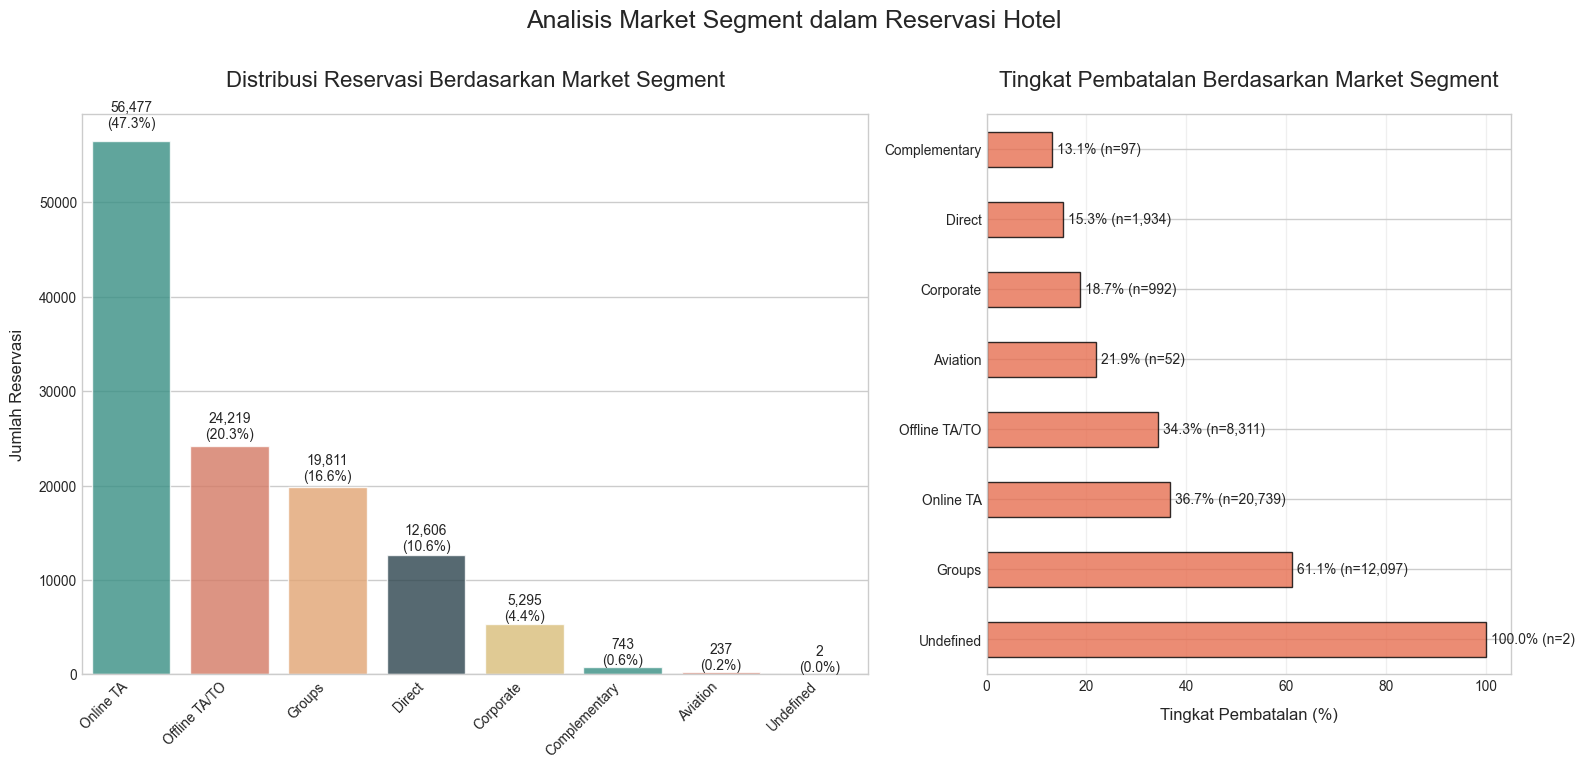

In [18]:
# Set style
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#2a9d8f', '#e76f51', '#f4a261', '#264653', '#e9c46a']

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [1.5, 1]})

# Analyze market segment data
market_segment_counts = df_train['market_segment'].value_counts().sort_values(ascending=False)
market_canceled = pd.crosstab(df_train['market_segment'], df_train['is_canceled'])
market_canceled_pct = pd.crosstab(df_train['market_segment'], df_train['is_canceled'], 
                                 normalize='index') * 100
market_canceled_pct.columns = ['Not Canceled', 'Canceled']

# Reindex based on frequency to maintain consistent order
order = market_segment_counts.index
market_canceled_pct = market_canceled_pct.reindex(order)
market_canceled = market_canceled.reindex(order)

# SUBPLOT 1: Market Segment Distribution
bars = sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, 
                  palette=colors[:len(market_segment_counts)], alpha=0.8, ax=ax1)

ax1.set_title('Distribusi Reservasi Berdasarkan Market Segment', fontsize=16, pad=20)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Jumlah Reservasi', fontsize=12, labelpad=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add count and percentage annotations
total = market_segment_counts.sum()
for i, p in enumerate(bars.patches):
    count = market_segment_counts.values[i]
    percentage = count / total * 100
    ax1.annotate(f'{count:,}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width()/2, p.get_height()*1.02),
                ha='center', va='bottom', fontsize=10)

# SUBPLOT 2: Cancellation Rate by Market Segment
market_canceled_pct['Canceled'].sort_values(ascending=False).plot(
    kind='barh', color=colors[1], alpha=0.8, ax=ax2, edgecolor='black', linewidth=1)

ax2.set_title('Tingkat Pembatalan Berdasarkan Market Segment', fontsize=16, pad=20)
ax2.set_xlabel('Tingkat Pembatalan (%)', fontsize=12, labelpad=10)
ax2.set_ylabel('')
ax2.grid(axis='x', alpha=0.3)

# Add cancellation rate and count annotations
for i, v in enumerate(market_canceled_pct['Canceled'].sort_values(ascending=False)):
    segment = market_canceled_pct['Canceled'].sort_values(ascending=False).index[i]
    count = market_canceled[market_canceled.index == segment][1].values[0]
    ax2.text(v + 1, i, f'{v:.1f}% (n={count:,})', va='center', fontsize=10)

plt.suptitle('Analisis Market Segment dalam Reservasi Hotel', fontsize=18, y=1.05)


plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.show()

---

## **Data Cleaning & Preparation**

### Outlier Handling

In [19]:
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [20]:
def remove_outliers(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]

for col in numerical_features:
    data_outlier = remove_outliers(df_train, col)

In [21]:
print("Total row before remove outlier:")
print(df_train.shape)
print("\nTotal row after remove outlier:")
print(data_outlier.shape)

Total row before remove outlier:
(119390, 34)

Total row after remove outlier:
(116513, 34)


### Null Values Handling

In [22]:
# Imputasi dan fitur baru untuk 'company'
data_outlier['company'] = data_outlier['company'].fillna(0)
data_outlier['company'] = data_outlier['company'].astype(int)
data_outlier['is_company'] = data_outlier['company'].apply(lambda x: 0 if x == 0 else 1)
data_outlier = data_outlier.drop(columns=['company'])

In [23]:
# Imputasi dan fitur baru untuk 'agent'
data_outlier['agent'] = data_outlier['agent'].fillna(0)
data_outlier['agent'] = data_outlier['agent'].astype(int)
data_outlier['is_agent'] = data_outlier['agent'].apply(lambda x: 0 if x == 0 else 1)
data_outlier = data_outlier.drop(columns=['agent'])

In [24]:
# Imputasi 'country' dengan modus
modus_country = data_outlier['country'].mode()[0]
data_outlier['country'] = data_outlier['country'].fillna(modus_country)

In [25]:
# Imputasi 'children' dengan 0 dan ubah ke int
data_outlier['children'] = data_outlier['children'].fillna(0)
data_outlier['children'] = data_outlier['children'].astype(int)

### Handling Invalid Values

In [26]:
cols_with_undefined = [
    'market_segment',
    'meal',
    'distribution_channel'
]

for col in cols_with_undefined:
    modus = data_outlier.loc[data_outlier[col] != 'Undefined', col].mode()[0]
    data_outlier[col] = data_outlier[col].replace('Undefined', modus)

### Handling Identical Features with Target

In [27]:
drop_cols = ['reservation_status', 'reservation_status_date']
data_outlier = data_outlier.drop(columns=drop_cols)

### Discretization (Data Binning)

In [28]:
# Binning lead_time
bins = [0, 7, 30, 60, 1000]
labels = ['Sangat Pendek', 'Pendek', 'Menengah', 'Panjang']
data_outlier['lead_time_bin'] = pd.cut(data_outlier['lead_time'], bins=bins, labels=labels, right=True, include_lowest=True)

# Tampilkan value count hasil binning
data_outlier['lead_time_bin'].value_counts()

lead_time_bin
Panjang          62172
Sangat Pendek    19359
Pendek           18427
Menengah         16555
Name: count, dtype: int64

### Feature Engineering

total guest

In [29]:
data_outlier['total_guest'] = data_outlier['adults'] + data_outlier['children'] + data_outlier['babies']

total nights

In [30]:
data_outlier['total_nights'] = data_outlier['stays_in_weekend_nights'] + data_outlier['stays_in_week_nights']

revenue

In [31]:
data_outlier['revenue'] = data_outlier['adr'] * data_outlier['total_nights']

### Encoding Categorical Data

In [32]:
# Cek dan tampilkan kolom kategorikal pada data_outlier dengan format yang rapi
kategorikal_kolom = data_outlier.select_dtypes(include=['object', 'category']).columns.tolist()

print("Daftar Kolom Kategorikal pada data_outlier:")
print("=" * 40)
for idx, kolom in enumerate(kategorikal_kolom, 1):
    print(f"{idx}. {kolom}")
print("=" * 40)
print(f"Total: {len(kategorikal_kolom)} kolom kategorikal")

Daftar Kolom Kategorikal pada data_outlier:
1. hotel
2. arrival_date_month
3. meal
4. country
5. market_segment
6. distribution_channel
7. reserved_room_type
8. assigned_room_type
9. deposit_type
10. customer_type
11. prev_cancel_cat
12. prev_notcancel_cat
13. lead_time_bin
Total: 13 kolom kategorikal


Label Encoder

In [33]:
le_cancel = LabelEncoder()
le_notcancel = LabelEncoder()

data_outlier['prev_cancel_cat_le'] = le_cancel.fit_transform(data_outlier['prev_cancel_cat'])
data_outlier['prev_notcancel_cat_le'] = le_notcancel.fit_transform(data_outlier['prev_notcancel_cat'])

# Setelah ini, kamu bisa drop kolom aslinya jika hanya ingin pakai versi LE
data_outlier = data_outlier.drop(columns=['prev_cancel_cat', 'prev_notcancel_cat'])

Value Mapping

In [34]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data_outlier['arrival_date_month_num'] = data_outlier['arrival_date_month'].map(month_map)
data_outlier = data_outlier.drop(columns=['arrival_date_month'])

### Data Train & Test Split (8:2)

In [ ]:
# Pisahkan fitur dan target
X = data_outlier.drop(columns=['is_canceled'])
y = data_outlier['is_canceled']

# Train-test split (misal 80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
# Tampilkan distribusi target di train dan test
def print_label_distribution(y, name):
    dist = y.value_counts(normalize=True).sort_index()
    print(f"Distribusi label pada {name}:")
    print("="*35)
    for label, prop in dist.items():
        print(f"Label {label}: {y.value_counts()[label]} ({prop:.2%})")
    print("="*35)

print_label_distribution(y_train, "Train Set")
print_label_distribution(y_test, "Test Set")

Distribusi label pada Train Set:
Label 0: 58218 (62.46%)
Label 1: 34992 (37.54%)
Distribusi label pada Test Set:
Label 0: 14555 (62.46%)
Label 1: 8748 (37.54%)


##### Data Standardization (StandardScaler)

In [37]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# (opsional) tampilkan 5 baris pertama hasil scaling
print("\nContoh hasil standardisasi fitur numerik:")
X_train[num_cols].head()


Contoh hasil standardisasi fitur numerik:


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,...,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_company,is_agent,total_guest,total_nights,revenue,arrival_date_month_num
30073,-0.833531,-0.217940,1.391096,-0.544674,-0.924563,-0.258248,0.265316,-0.07307,-0.178878,-0.103747,...,-0.133757,-1.175926,-0.250777,0.716013,-0.246886,0.397822,0.055362,-0.55384,-0.817558,1.445607
15992,-0.973329,-1.634646,0.435997,-0.772470,0.077326,-1.306831,0.265316,-0.07307,-0.178878,-0.103747,...,-0.133757,0.485821,-0.250777,-0.739055,-0.246886,-2.513687,0.055362,-0.94514,-0.688318,0.475518
105381,-0.880131,1.198766,-1.547669,-1.228063,0.077326,-1.306831,0.265316,-0.07307,-0.178878,-0.103747,...,-0.133757,-0.262093,-0.250777,0.716013,-0.246886,0.397822,0.055362,-0.94514,-0.802903,-1.464659
67643,0.788128,1.198766,-0.666040,-1.228063,0.077326,-0.258248,0.265316,-0.07307,-0.178878,-0.103747,...,-0.133757,-0.025909,-0.250777,-0.739055,-0.246886,0.397822,0.055362,-0.16254,-0.163639,-0.494571
60444,-0.544615,-0.217940,1.391096,-0.544674,-0.924563,-0.258248,0.265316,-0.07307,-0.178878,-0.103747,...,-0.133757,-0.435294,-0.250777,0.716013,-0.246886,0.397822,0.055362,-0.55384,-0.590619,1.445607


In [38]:
data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116513 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           116513 non-null  object  
 1   is_canceled                     116513 non-null  int64   
 2   lead_time                       116513 non-null  int64   
 3   arrival_date_year               116513 non-null  int64   
 4   arrival_date_week_number        116513 non-null  int64   
 5   arrival_date_day_of_month       116513 non-null  int64   
 6   stays_in_weekend_nights         116513 non-null  int64   
 7   stays_in_week_nights            116513 non-null  int64   
 8   adults                          116513 non-null  int64   
 9   children                        116513 non-null  int32   
 10  babies                          116513 non-null  int64   
 11  meal                            116513 non-null  object  
 12  country

---

## **Build CatBoost Classifier Model (Before Tuning)**

In [39]:
cat_features = [
    'hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'lead_time_bin']

In [40]:
# Buat model CatBoostClassifier dengan parameter default
catboost_model = cb.CatBoostClassifier()

# Training model, hanya perlu cat_features untuk fitur kategorikal
catboost_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=50,            # Output setiap 50 iterasi
    use_best_model=True    # Pilih model terbaik di validation
)

# Prediksi pada data test
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.097133
0:	learn: 0.6133316	test: 0.6126429	best: 0.6126429 (0)	total: 250ms	remaining: 4m 10s
50:	learn: 0.3196923	test: 0.3215342	best: 0.3215342 (50)	total: 5.67s	remaining: 1m 45s
100:	learn: 0.3019006	test: 0.3061344	best: 0.3061344 (100)	total: 11.9s	remaining: 1m 46s
150:	learn: 0.2904345	test: 0.2970581	best: 0.2970581 (150)	total: 17.6s	remaining: 1m 39s
200:	learn: 0.2825790	test: 0.2916912	best: 0.2916877 (199)	total: 23.3s	remaining: 1m 32s
250:	learn: 0.2763530	test: 0.2876218	best: 0.2876218 (250)	total: 29.4s	remaining: 1m 27s
300:	learn: 0.2714565	test: 0.2849474	best: 0.2849474 (300)	total: 34.8s	remaining: 1m 20s
350:	learn: 0.2672761	test: 0.2829174	best: 0.2829174 (350)	total: 40.6s	remaining: 1m 15s
400:	learn: 0.2630601	test: 0.2809757	best: 0.2809757 (400)	total: 46.4s	remaining: 1m 9s
450:	learn: 0.2595945	test: 0.2791765	best: 0.2791765 (450)	total: 52.3s	remaining: 1m 3s
500:	learn: 0.2560926	test: 0.2774756	best: 0.2774756 (500)	total: 5

## **Evaluate The CatBoost Classifier Model (Before Tuning)**

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print(f"📊 Akurasi Model CatBoost: {accuracy:.4f}")
print("="*50)

📊 Akurasi Model CatBoost: 0.8779


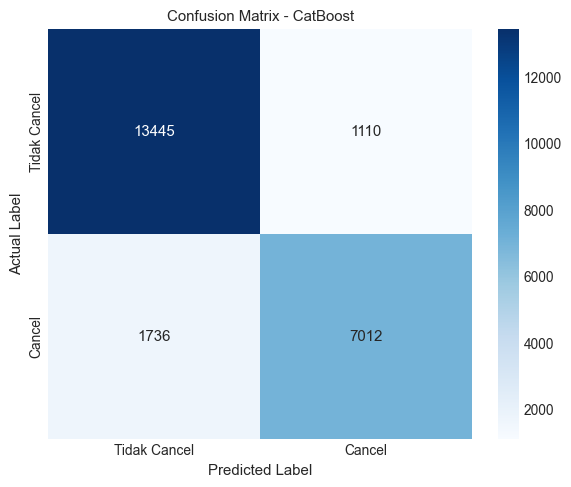

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True, fmt="d", cmap="Blues",
    xticklabels=["Tidak Cancel", "Cancel"],
    yticklabels=["Tidak Cancel", "Cancel"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - CatBoost")
plt.tight_layout()
plt.show()

In [43]:
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Tidak Cancel", "Cancel"]))


📄 Classification Report:
              precision    recall  f1-score   support

Tidak Cancel       0.89      0.92      0.90     14555
      Cancel       0.86      0.80      0.83      8748

    accuracy                           0.88     23303
   macro avg       0.87      0.86      0.87     23303
weighted avg       0.88      0.88      0.88     23303



🔸 AUC: 0.9506


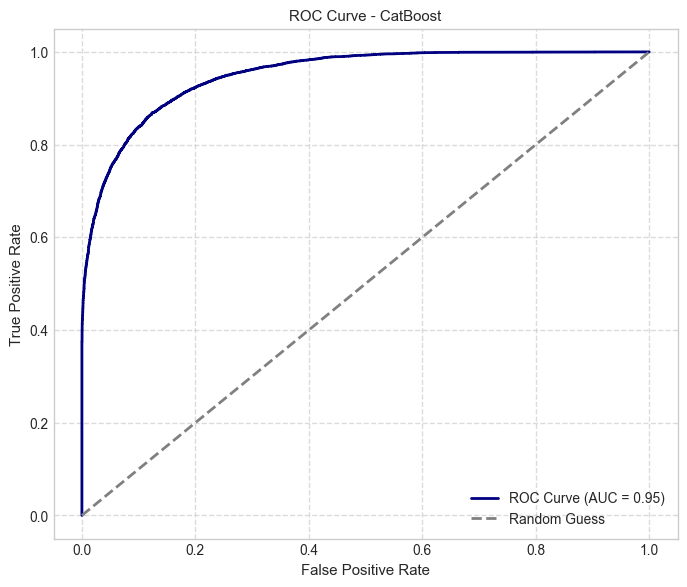

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"🔸 AUC: {roc_auc:.4f}")
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

## **Hyperparameter Tuning CatBoost Classifier Model (Optuna)**

In [51]:
# Fungsi objective untuk Optuna
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": False,
        "cat_features": cat_features,
        "task_type": "GPU",
        "early_stopping_rounds": 30,
    }
    model = cb.CatBoostClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        use_best_model=True,
    )
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred_proba)
    return score

# Optuna study
study = optuna.create_study(direction="maximize", study_name="CatBoost Optuna")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best trial:")
print(f"  AUC: {study.best_value:.4f}")
print("  Params:", study.best_params)

[I 2025-05-25 13:31:58,395] A new study created in memory with name: CatBoost Optuna


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-05-25 13:32:50,928] Trial 0 finished with value: 0.95274752499742 and parameters: {'iterations': 912, 'learning_rate': 0.06021263877529996, 'depth': 8, 'l2_leaf_reg': 4.311210727114823, 'random_strength': 6.501779806782108e-07, 'bagging_temperature': 0.2334926036301228, 'border_count': 126}. Best is trial 0 with value: 0.95274752499742.
[I 2025-05-25 13:33:23,193] Trial 1 finished with value: 0.938531168610243 and parameters: {'iterations': 695, 'learning_rate': 0.012176286281110074, 'depth': 7, 'l2_leaf_reg': 4.3050464604122025, 'random_strength': 0.0002876591895776305, 'bagging_temperature': 0.20688701830436462, 'border_count': 235}. Best is trial 0 with value: 0.95274752499742.
[I 2025-05-25 13:33:56,684] Trial 2 finished with value: 0.9364939674290965 and parameters: {'iterations': 916, 'learning_rate': 0.010865808029512735, 'depth': 6, 'l2_leaf_reg': 8.386015157400767, 'random_strength': 0.06008454414722458, 'bagging_temperature': 0.3896642039686744, 'border_count': 121}. 

In [53]:
# Dapatkan parameter terbaik dari hasil Optuna
best_params = study.best_params.copy()
best_params["cat_features"] = cat_features
best_params["task_type"] = "GPU"  # atau "CPU" jika tidak ada GPU
best_params["verbose"] = 50
best_params["early_stopping_rounds"] = 30

# Buat dan fit ulang model CatBoost dengan parameter terbaik
best_model = cb.CatBoostClassifier(**best_params)
best_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

0:	learn: 0.6098276	test: 0.6088575	best: 0.6088575 (0)	total: 133ms	remaining: 1m 55s
50:	learn: 0.2911086	test: 0.3024660	best: 0.3024660 (50)	total: 5.74s	remaining: 1m 32s
100:	learn: 0.2610531	test: 0.2834870	best: 0.2834870 (100)	total: 11.6s	remaining: 1m 28s
150:	learn: 0.2443752	test: 0.2757906	best: 0.2757906 (150)	total: 17.5s	remaining: 1m 23s
200:	learn: 0.2298370	test: 0.2699654	best: 0.2699654 (200)	total: 23.6s	remaining: 1m 18s
250:	learn: 0.2180197	test: 0.2663336	best: 0.2663336 (250)	total: 29.7s	remaining: 1m 13s
300:	learn: 0.2087763	test: 0.2638767	best: 0.2638767 (300)	total: 35.4s	remaining: 1m 6s
350:	learn: 0.1996131	test: 0.2617834	best: 0.2617834 (350)	total: 41.1s	remaining: 1m
400:	learn: 0.1907823	test: 0.2598448	best: 0.2598448 (400)	total: 47.2s	remaining: 55.1s
450:	learn: 0.1836865	test: 0.2582830	best: 0.2582572 (449)	total: 52.9s	remaining: 49s
500:	learn: 0.1767210	test: 0.2569608	best: 0.2569542 (499)	total: 59s	remaining: 43.3s
550:	learn: 0.169

## **Evaluate The CatBoost Classifier Model (After Tuning)**

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print(f"📊 Akurasi Model CatBoost: {accuracy:.4f}")
print("="*50)

📊 Akurasi Model CatBoost: 0.8903


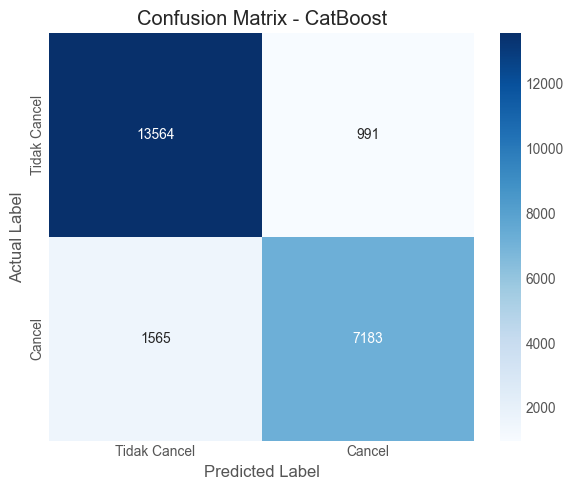

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True, fmt="d", cmap="Blues",
    xticklabels=["Tidak Cancel", "Cancel"],
    yticklabels=["Tidak Cancel", "Cancel"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - CatBoost")
plt.tight_layout()
plt.show()

In [56]:
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Tidak Cancel", "Cancel"]))


📄 Classification Report:
              precision    recall  f1-score   support

Tidak Cancel       0.90      0.93      0.91     14555
      Cancel       0.88      0.82      0.85      8748

    accuracy                           0.89     23303
   macro avg       0.89      0.88      0.88     23303
weighted avg       0.89      0.89      0.89     23303



🔸 AUC: 0.9571


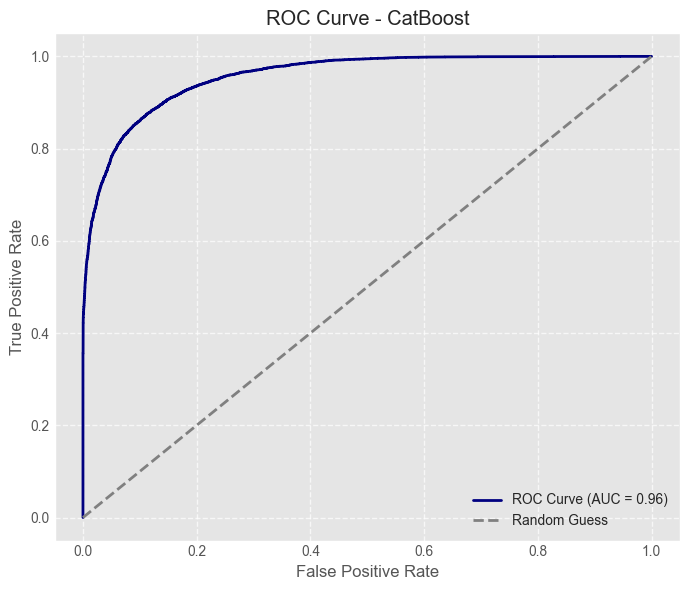

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"🔸 AUC: {roc_auc:.4f}")

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance

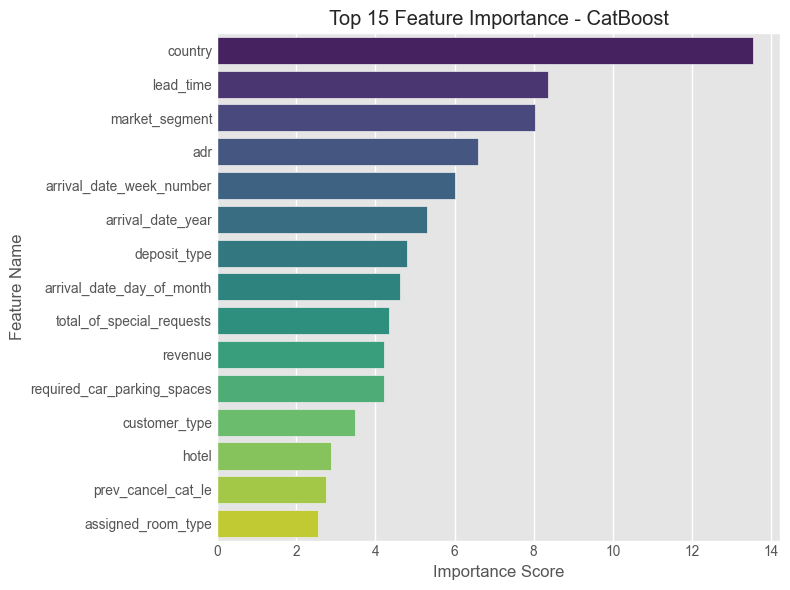

In [58]:
# Ambil nama kolom fitur
feature_names = X_train.columns

# Ambil nilai feature importance dari model
importances = best_model.get_feature_importance()
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Tampilkan 15 fitur teratas (atau semua jika <15)
top_n = 15 if len(feat_imp_df) > 15 else len(feat_imp_df)
plt.figure(figsize=(8, max(5, top_n * 0.4)))
sns.barplot(
    data=feat_imp_df.head(top_n),
    y="Feature", x="Importance", palette="viridis"
)
plt.title(f"Top {top_n} Feature Importance - CatBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [59]:
display(feat_imp_df)

,Feature,Importance
11,country,13.541261
1,lead_time,8.357196
12,market_segment,8.030028
23,adr,6.591460
3,arrival_date_week_number,6.002000
2,arrival_date_year,5.303327
20,deposit_type,4.804203
4,arrival_date_day_of_month,4.621372
25,total_of_special_requests,4.342032
31,revenue,4.224029


---

## **Export CatBoost Model**

In [60]:
best_model.save_model("catboost_model.cbm")

---

&nbsp;
&nbsp;

# **K-Means Model (Clustering)**

---

## **Pre-Modelling**

### Feature Selection for Clustering

In [65]:
# Pilih beberapa fitur numerik & kategorikal
cols_clustering = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "adr",
    "customer_type",    # kategorikal
    "deposit_type"      # kategorikal
]

# Ambil data yang sudah diproses outliernya
data_for_cluster = data_outlier[cols_clustering].copy()

# One-hot encoding untuk kolom kategorikal
categorical_cols = ["customer_type", "deposit_type"]
data_clustering = pd.get_dummies(data_for_cluster, columns=categorical_cols, drop_first=True)

In [66]:
data_clustering.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,342,0,0,2,0,0,0.0,False,True,False,False,False
1,737,0,0,2,0,0,0.0,False,True,False,False,False
2,7,0,1,1,0,0,75.0,False,True,False,False,False
3,13,0,1,1,0,0,75.0,False,True,False,False,False
4,14,0,2,2,0,0,98.0,False,True,False,False,False


### Data Standardization (StandardScaler)

In [67]:
# Daftar kolom numerik (sebelum encoding)
numerical_cols = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "adr"
]

# Pisahkan fitur numerik dan dummy kategorikal
data_num = data_clustering[numerical_cols]
data_dummy = data_clustering.drop(columns=numerical_cols)

# Scaling hanya fitur numerik
scaler = StandardScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num), columns=numerical_cols, index=data_clustering.index)

# Gabungkan lagi
data_clustering_scaled = pd.concat([data_num_scaled, data_dummy], axis=1)

In [68]:
data_clustering_scaled.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,2.216530,-0.927433,-1.313588,0.253082,-0.255668,-0.074924,-2.016349,False,True,False,False,False
1,5.898893,-0.927433,-1.313588,0.253082,-0.255668,-0.074924,-2.016349,False,True,False,False,False
2,-0.906487,-0.927433,-0.786135,-1.467500,-0.255668,-0.074924,-0.523001,False,True,False,False,False
3,-0.850552,-0.927433,-0.786135,-1.467500,-0.255668,-0.074924,-0.523001,False,True,False,False,False
4,-0.841230,-0.927433,-0.258681,0.253082,-0.255668,-0.074924,-0.065041,False,True,False,False,False


### Data Reduction Using PCA with 2 Components

In [69]:
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(data_clustering_scaled)  

pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.430846,-1.389314
1,-0.620821,-2.680574
2,-1.898225,0.134916
3,-1.885921,0.115302
4,-0.842132,0.539955


### Determining the Optimal K (Elbow Method)

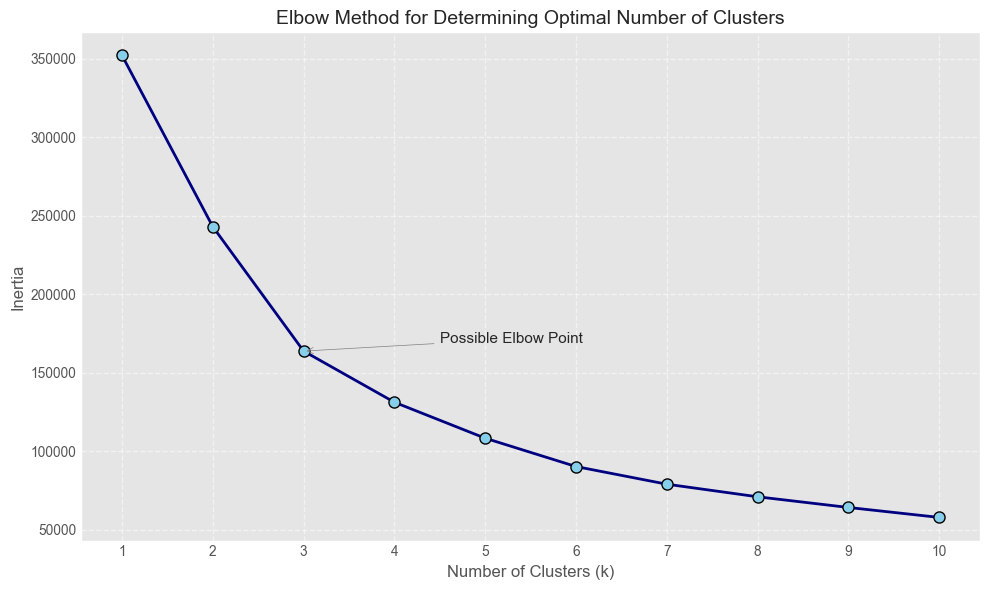

In [70]:
# Menentukan rentang nilai k (jumlah cluster yang dicoba)
inertia = []
k_range = range(1, 11)

# Melakukan KMeans untuk setiap nilai k dan menyimpan inertia-nya
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df)  # Menggunakan data PCA yang sudah di-scale
    inertia.append(kmeans.inertia_)

# Visualisasi menggunakan Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='navy', linewidth=2, markersize=8, markerfacecolor='skyblue', markeredgecolor='black')
plt.xticks(k_range)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Determining Optimal Number of Clusters', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Menambahkan anotasi untuk meng-highlight titik elbow (jika terlihat)
plt.annotate('Possible Elbow Point', 
             xy=(3, inertia[2]), 
             xytext=(4.5, inertia[2] + 5000),
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=11)

plt.tight_layout()
plt.show()

---

## **Build K-Means Model**

In [81]:
# Nilai k optimal berdasarkan analisis sebelumnya
optimal_k = 3

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_df)

# Menambahkan label cluster ke dataframe original
data_outlier['Cluster'] = cluster_labels

# Menghitung silhouette score keseluruhan
silhouette_avg = silhouette_score(pca_df, cluster_labels)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score untuk k=3: 0.4343


### Visualizing Clustering Results and Centroids

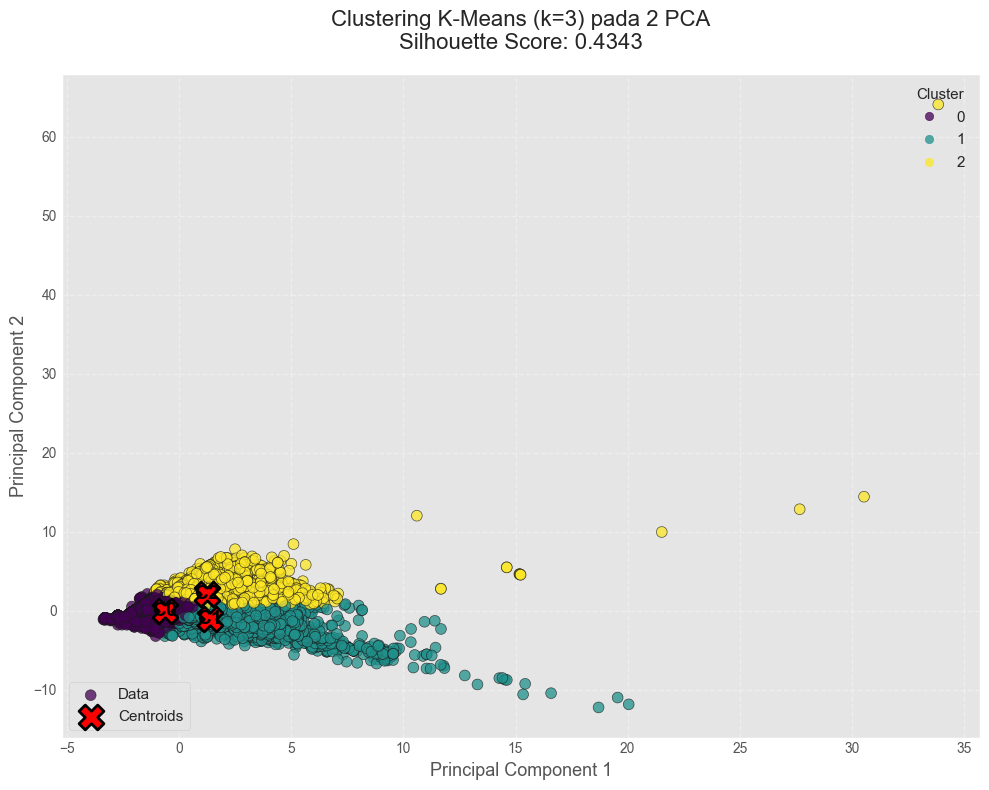

In [82]:
# Melakukan clustering KMeans pada data PCA
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_df)

# Tambahkan label cluster ke data outlier
data_outlier['Cluster'] = cluster_labels

# Hitung silhouette score
silhouette_avg = silhouette_score(pca_df, cluster_labels)

# Mendapatkan centroid di ruang asli dan transform ke PCA
centroids = kmeans.cluster_centers_
centroids_pca = centroids  # Cluster sudah di-fit pada PCA, jadi centroid sudah di ruang PCA

# Visualisasi
plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", as_cmap=True)

# Plot data per cluster
scatter = plt.scatter(
    pca_df.iloc[:, 0], pca_df.iloc[:, 1],
    c=cluster_labels, cmap='viridis',
    s=60, alpha=0.75, edgecolor='k', linewidth=0.5,
    label='Data'
)

# Plot centroid
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='red', s=320, marker='X', edgecolor='black', linewidth=2,
    label='Centroids'
)

# Anotasi centroid (opsional, bisa dihapus)
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, f'C{i}', color='black', fontsize=14, fontweight='bold', ha='center', va='center')

# Title & label
plt.title(f'Clustering K-Means (k={optimal_k}) pada 2 PCA\nSilhouette Score: {silhouette_avg:.4f}', fontsize=16, pad=18)
plt.xlabel('Principal Component 1', fontsize=13)
plt.ylabel('Principal Component 2', fontsize=13)

# Legend
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster", loc="upper right", fontsize=11)
plt.gca().add_artist(legend1)
plt.legend(["Data", "Centroids"], loc='lower left', fontsize=11, frameon=True)

plt.grid(True, linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

---

## **Export KMeans Model**

In [83]:
import joblib

joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

---

&nbsp;
&nbsp;